In [1]:
import logging

logging.basicConfig(level=logging.INFO)

# Trains of Though Test Bed: Little Red Riding Hood
<table><tr>
<td><img title="Gustave Doré's engraving of the classic tale" src="figs/image-01.jpg"></td>
<td><img title="Hoodwinked! (2015)" src="figs/image-02.jpg"></td>
</tr></table>

## Preliminaries

Load [`text8` corpus][1].

 [1]: http://mattmahoney.net/dc/textdata.html (About the Test Data)

In [2]:
import gensim.downloader as api
from gensim.models import TfidfModel
from gensim.corpora import Dictionary

dataset = api.load('text8')
dictionary = Dictionary(dataset)
corpus = [dictionary.doc2bow(line) for line in dataset]
tfidf = TfidfModel(corpus)

INFO:summarizer.preprocessing.cleaner:'pattern' package not found; tag filters are not available for English
INFO:gensim.corpora.dictionary:adding document #0 to Dictionary(0 unique tokens: [])
INFO:gensim.corpora.dictionary:built Dictionary(253854 unique tokens: ['diebitsch', 'chine', 'quilca', 'trol', 'gamecubes']...) from 1701 documents (total 17005207 corpus positions)
INFO:gensim.models.tfidfmodel:collecting document frequencies
INFO:gensim.models.tfidfmodel:PROGRESS: processing document #0
INFO:gensim.models.tfidfmodel:calculating IDF weights for 1701 documents and 253853 features (4318888 matrix non-zeros)


Produce word embeddings.

In [3]:
import gensim.downloader as api
from gensim.models.word2vec import Word2Vec

model = Word2Vec(dataset).wv

INFO:gensim.models.word2vec:collecting all words and their counts
INFO:gensim.models.word2vec:PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
INFO:gensim.models.word2vec:collected 253854 word types from a corpus of 17005207 raw words and 1701 sentences
INFO:gensim.models.word2vec:Loading a fresh vocabulary
INFO:gensim.models.word2vec:effective_min_count=5 retains 71290 unique words (28% of original 253854, drops 182564)
INFO:gensim.models.word2vec:effective_min_count=5 leaves 16718844 word corpus (98% of original 17005207, drops 286363)
INFO:gensim.models.word2vec:deleting the raw counts dictionary of 253854 items
INFO:gensim.models.word2vec:sample=0.001 downsamples 38 most-common words
INFO:gensim.models.word2vec:downsampling leaves estimated 12506280 word corpus (74.8% of prior 16718844)
INFO:gensim.models.base_any2vec:estimated required memory for 71290 words and 100 dimensions: 92677000 bytes
INFO:gensim.models.word2vec:resetting layer weights
INFO:gensim.models.b

INFO:gensim.models.base_any2vec:EPOCH 2 - PROGRESS: at 52.85% examples, 310040 words/s, in_qsize 5, out_qsize 0
INFO:gensim.models.base_any2vec:EPOCH 2 - PROGRESS: at 55.44% examples, 310703 words/s, in_qsize 5, out_qsize 0
INFO:gensim.models.base_any2vec:EPOCH 2 - PROGRESS: at 58.02% examples, 310419 words/s, in_qsize 5, out_qsize 0
INFO:gensim.models.base_any2vec:EPOCH 2 - PROGRESS: at 60.26% examples, 309078 words/s, in_qsize 5, out_qsize 0
INFO:gensim.models.base_any2vec:EPOCH 2 - PROGRESS: at 62.61% examples, 308380 words/s, in_qsize 5, out_qsize 0
INFO:gensim.models.base_any2vec:EPOCH 2 - PROGRESS: at 64.61% examples, 305742 words/s, in_qsize 6, out_qsize 0
INFO:gensim.models.base_any2vec:EPOCH 2 - PROGRESS: at 67.08% examples, 305333 words/s, in_qsize 3, out_qsize 2
INFO:gensim.models.base_any2vec:EPOCH 2 - PROGRESS: at 69.31% examples, 304199 words/s, in_qsize 4, out_qsize 2
INFO:gensim.models.base_any2vec:EPOCH 2 - PROGRESS: at 72.08% examples, 305440 words/s, in_qsize 5, out_

INFO:gensim.models.base_any2vec:EPOCH 4 - PROGRESS: at 26.87% examples, 328686 words/s, in_qsize 4, out_qsize 1
INFO:gensim.models.base_any2vec:EPOCH 4 - PROGRESS: at 29.22% examples, 325038 words/s, in_qsize 5, out_qsize 0
INFO:gensim.models.base_any2vec:EPOCH 4 - PROGRESS: at 32.16% examples, 328345 words/s, in_qsize 5, out_qsize 0
INFO:gensim.models.base_any2vec:EPOCH 4 - PROGRESS: at 34.69% examples, 327663 words/s, in_qsize 5, out_qsize 0
INFO:gensim.models.base_any2vec:EPOCH 4 - PROGRESS: at 37.21% examples, 326567 words/s, in_qsize 5, out_qsize 0
INFO:gensim.models.base_any2vec:EPOCH 4 - PROGRESS: at 40.09% examples, 328293 words/s, in_qsize 5, out_qsize 0
INFO:gensim.models.base_any2vec:EPOCH 4 - PROGRESS: at 42.56% examples, 326602 words/s, in_qsize 3, out_qsize 2
INFO:gensim.models.base_any2vec:EPOCH 4 - PROGRESS: at 44.80% examples, 323203 words/s, in_qsize 5, out_qsize 0
INFO:gensim.models.base_any2vec:EPOCH 4 - PROGRESS: at 47.21% examples, 322016 words/s, in_qsize 4, out_

INFO:gensim.models.base_any2vec:EPOCH 5 - PROGRESS: at 99.41% examples, 297021 words/s, in_qsize 5, out_qsize 0
INFO:gensim.models.base_any2vec:worker thread finished; awaiting finish of 2 more threads
INFO:gensim.models.base_any2vec:worker thread finished; awaiting finish of 1 more threads
INFO:gensim.models.base_any2vec:worker thread finished; awaiting finish of 0 more threads
INFO:gensim.models.base_any2vec:EPOCH - 5 : training on 17005207 raw words (12505486 effective words) took 42.1s, 297333 effective words/s
INFO:gensim.models.base_any2vec:training on a 85026035 raw words (62527071 effective words) took 203.8s, 306805 effective words/s


Load the script of [Hoodwinked! (2005)](https://www.imdb.com/title/tt0443536/), the text of the Little Red Cap (Grimm J. and Grimm W., 1812), and the English translation of le Petit Chaperon Rouge (Perrault, 1697).

In [4]:
from gensim.utils import simple_preprocess

def preprocess(f, segment_min_size=100, segment_separator='\n\n'):
    tfidf_combined_segments = []
    combined_segment = []
    for segment in f.read().split(segment_separator):
        combined_segment.extend(simple_preprocess(segment))
        if len(combined_segment) >= segment_min_size:
            tfidf_combined_segment = tfidf[dictionary.doc2bow(combined_segment)]
            tfidf_combined_segments.append(tfidf_combined_segment)
            combined_segment = []
    return tfidf_combined_segments

!test -e hoodwinked.txt || wget http://www.veryabc.cn/movie/uploads/script/hoodwinked.txt
with open('hoodwinked.txt', 'rt') as f:
    hoodwinked = preprocess(f)

!test -e littleredcap.txt || wget https://www.cs.cmu.edu/~spok/grimmtmp/020.txt -O littleredcap.txt
with open('littleredcap.txt', 'rt') as f:
    littleredcap = preprocess(f)

!test -e lrrhood.txt || wget http://textfiles.com/stories/lrrhood.txt
with open('lrrhood.txt', 'rt') as f:
    lrrhood = preprocess(f, segment_separator='\n  ')

## Baseline document representation
As a baseline representation, we use the TF-IDF-weighted average of word embeddings.

In [5]:
import npstreams

def baseline_representation(tfidf_segments):
    return npstreams.mean(
        weight * model.vectors[model.vocab[dictionary.id2token[index]].index]
        for segment in tfidf_segments
        for index, weight in segment
        if dictionary[index] in model.vocab
    )

hoodwinked_baseline = baseline_representation(hoodwinked)
littleredcap_baseline = baseline_representation(littleredcap)
lrrhood_baseline = baseline_representation(lrrhood)

In [6]:
from sklearn.manifold import MDS

baselines_mds = MDS()
baselines_2d = baselines_mds.fit_transform((hoodwinked_baseline, littleredcap_baseline, lrrhood_baseline))
hoodwinked_baseline_2d, littleredcap_baseline_2d, lrrhood_baseline_2d = baselines_2d

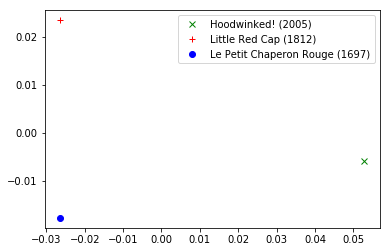

In [7]:
%matplotlib inline
from matplotlib import pyplot as plt

fig, ax = plt.subplots()
ax.plot(*zip(hoodwinked_baseline_2d), 'gx', label='Hoodwinked! (2005)')
ax.plot(*zip(littleredcap_baseline_2d), 'r+', label='Little Red Cap (1812)')
ax.plot(*zip(lrrhood_baseline_2d), 'bo', label='Le Petit Chaperon Rouge (1697)')
plt.legend(loc='best')
plt.savefig('figs/baseline.pdf')
plt.show()

In [8]:
import numpy as np
from scipy.spatial.distance import cosine

print('Hoodwinked (2015) and Little Red Cap (1812)')
print('===========================================')
euclidean_distance = np.linalg.norm(hoodwinked_baseline - littleredcap_baseline)
cosine_similarity = 1 - cosine(hoodwinked_baseline, littleredcap_baseline)
print('Euclidean distance:\t{}'.format(euclidean_distance))
print('Cosine similarity:\t{}'.format(cosine_similarity))

print()
print('Hoodwinked (2015) and Le Petit Chaperon Rouge (Perrault, 1697)')
print('==============================================================')
euclidean_distance = np.linalg.norm(hoodwinked_baseline - lrrhood_baseline)
cosine_similarity = 1 - cosine(hoodwinked_baseline, lrrhood_baseline)
print('Euclidean distance:\t{}'.format(euclidean_distance))
print('Cosine similarity:\t{}'.format(cosine_similarity))

print()
print('Little Red Cap (1812) and Le Petit Chaperon Rouge (Perrault, 1697)')
print('==================================================================')
euclidean_distance = np.linalg.norm(littleredcap_baseline - lrrhood_baseline)
cosine_similarity = 1 - cosine(littleredcap_baseline, lrrhood_baseline)
print('Euclidean distance:\t{}'.format(euclidean_distance))
print('Cosine similarity:\t{}'.format(cosine_similarity))

Hoodwinked (2015) and Little Red Cap (1812)
Euclidean distance:	0.08388321055460352
Cosine similarity:	0.897175410649229

Hoodwinked (2015) and Le Petit Chaperon Rouge (Perrault, 1697)
Euclidean distance:	0.08062186862010735
Cosine similarity:	0.9106159518602721

Little Red Cap (1812) and Le Petit Chaperon Rouge (Perrault, 1697)
Euclidean distance:	0.04151302647523517
Cosine similarity:	0.9768411041922875


## Curve representation

As a primary representation, we use curves constructed from baseline representations of segments.

In [18]:
import npstreams
from sklearn import preprocessing

def curve_representation(tfidf_segments):
    curve = [
        npstreams.mean(
            weight * model.vectors[model.vocab[dictionary.id2token[index]].index]
            for index, weight in segment
            if dictionary[index] in model.vocab
        )
        for segment in tfidf_segments
    ]
    return list(preprocessing.scale(curve, with_std=False, with_mean=False))

hoodwinked_curve = curve_representation(hoodwinked)
littleredcap_curve = curve_representation(littleredcap)
lrrhood_curve = curve_representation(lrrhood)

In [19]:
from sklearn.manifold import MDS

curves_mds = MDS()
curves_2d = curves_mds.fit_transform(
    hoodwinked_curve + littleredcap_curve + lrrhood_curve + [
        hoodwinked_baseline,
        littleredcap_baseline,
        lrrhood_baseline,
    ]
)
hoodwinked_curve_2d = curves_2d[:len(hoodwinked_curve)]
littleredcap_curve_2d = curves_2d[len(hoodwinked_curve):len(hoodwinked_curve) + len(littleredcap_curve)]
lrrhood_curve_2d = curves_2d[len(hoodwinked_curve) + len(littleredcap_curve):-3]
hoodwinked_baseline_2d = curves_2d[-3]
littleredcap_baseline_2d = curves_2d[-2]
lrrhood_baseline_2d = curves_2d[-1]

In [20]:
import numpy as np
from scipy.interpolate import splprep, splev

def smooth_curve(curve, step_size=0.001):
    smooth_u = np.arange(0, 1, step_size)
    tck, u = splprep(tuple(zip(*curve)), s=0)
    smooth_curve = tuple(zip(*splev(smooth_u, tck)))
    return smooth_curve

hoodwinked_smooth_curve_2d = smooth_curve(hoodwinked_curve_2d)
littleredcap_smooth_curve_2d = smooth_curve(littleredcap_curve_2d)
lrrhood_smooth_curve_2d = smooth_curve(lrrhood_curve_2d)

In [23]:
%%capture
import matplotlib.animation as animation
from matplotlib import pyplot as plt
from os import getcwd

fig, ax = plt.subplots(figsize=(20, 10))
hoodwinked_line, = ax.plot(*zip(*hoodwinked_smooth_curve_2d), 'g-', label='Hoodwinked! (2005)')
littleredcap_line, = ax.plot(*zip(*littleredcap_smooth_curve_2d), 'r-', label='Little Red Cap (1812)')
lrrhood_line, = ax.plot(*zip(*lrrhood_smooth_curve_2d), 'b-', label='Le Petit Chaperon Rouge (1697)')
plt.legend(loc='upper right')

def update(num):
    hoodwinked_line.set_data(*zip(*hoodwinked_smooth_curve_2d[:num + 1]))
    littleredcap_line.set_data(*zip(*littleredcap_smooth_curve_2d[:num + 1]))
    lrrhood_line.set_data(*zip(*lrrhood_smooth_curve_2d[:num + 1]))
    return hoodwinked_line, littleredcap_line, lrrhood_line

ani = animation.FuncAnimation(fig, update, len(hoodwinked_smooth_curve_2d), interval=10)
ani.save('{}/figs/curves.mp4'.format(getcwd()))

INFO:matplotlib.animation:Animation.save using <class 'matplotlib.animation.FFMpegWriter'>
INFO:matplotlib.animation:MovieWriter.run: running command: ['ffmpeg', '-f', 'rawvideo', '-vcodec', 'rawvideo', '-s', '1440x720', '-pix_fmt', 'rgba', '-r', '100.0', '-loglevel', 'quiet', '-i', 'pipe:', '-vcodec', 'h264', '-pix_fmt', 'yuv420p', '-y', '/home/witiko/tmp/trains-of-thought-hoodwinked/figs/curves.mp4']


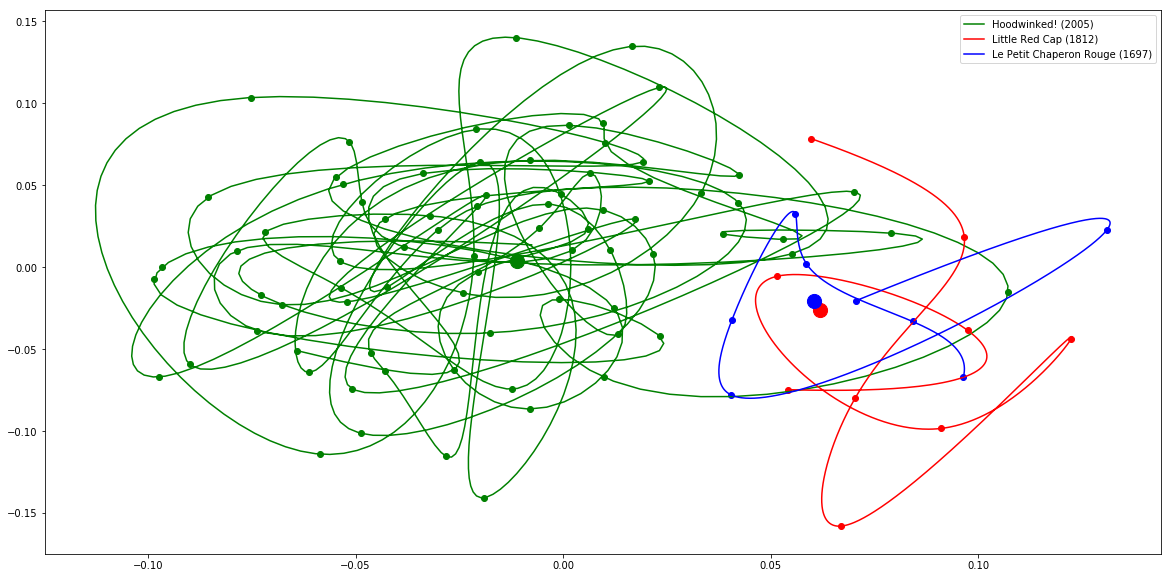

In [22]:
%matplotlib inline
from matplotlib import pyplot as plt

fig, ax = plt.subplots(figsize=(20, 10))
ax.plot(*zip(*hoodwinked_smooth_curve_2d), 'g-', label='Hoodwinked! (2005)')
ax.scatter(*zip(*hoodwinked_curve_2d), color='g')
ax.scatter(*zip(hoodwinked_baseline_2d), 200, color='g')

ax.plot(*zip(*littleredcap_smooth_curve_2d), 'r-', label='Little Red Cap (1812)')
ax.scatter(*zip(*littleredcap_curve_2d), color='r')
ax.scatter(*zip(littleredcap_baseline_2d), 200, color='r')

ax.plot(*zip(*lrrhood_smooth_curve_2d), 'b-', label='Le Petit Chaperon Rouge (1697)')
ax.scatter(*zip(*lrrhood_curve_2d), color='b')
ax.scatter(*zip(lrrhood_baseline_2d), 200, color='b')

plt.legend(loc='upper right')
plt.savefig('figs/curves.pdf')
plt.show()

### Dynamic Time Warping
As one measure of distance between the curves, we compute the the [dynamic time warping][1] (DTW) using the [FastDTW method][2] (Salvador and Chan, 2007).

 [1]: https://en.wikipedia.org/wiki/Dynamic_time_warping (Dynamic time warping)
 [2]: https://content.iospress.com/articles/intelligent-data-analysis/ida00303 (Toward accurate dynamic time warping in linear time and space)

In [24]:
littleredcap_smooth_curve_2d_shifted = [
    (x + 0.2, y - 0.2)
    for x, y in littleredcap_smooth_curve_2d
]
littleredcap_curve_2d_shifted = [
    (x + 0.2, y - 0.2)
    for x, y in littleredcap_curve_2d
]

lrrhood_smooth_curve_2d_shifted = [
    (x - 0.2, y - 0.2)
    for x, y in lrrhood_smooth_curve_2d
]
lrrhood_curve_2d_shifted = [
    (x - 0.2, y - 0.2)
    for x, y in lrrhood_curve_2d
]

/home/witiko/.virtualenvs/gensim/lib/python3.5/site-packages/ipykernel_launcher.py:9: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if __name__ == '__main__':
/home/witiko/.virtualenvs/gensim/lib/python3.5/site-packages/ipykernel_launcher.py:18: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
/home/witiko/.virtualenvs/gensim/lib/python3.5/site-packages/ipykernel_launcher.py:27: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.


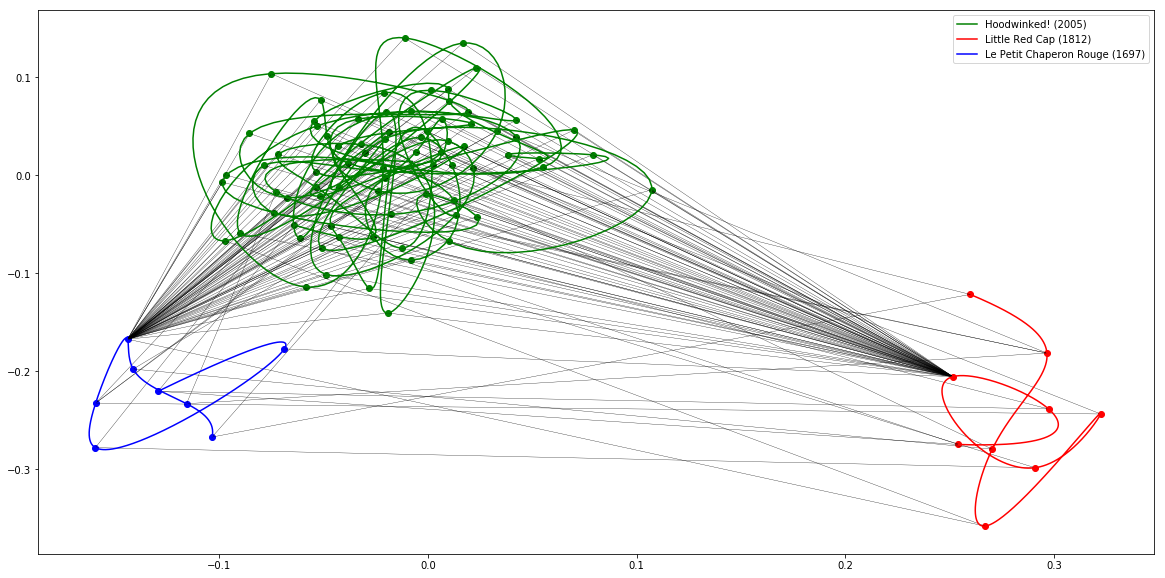

In [25]:
%matplotlib inline
from fastdtw import fastdtw
from matplotlib import pyplot as plt
import numpy as np
from scipy.spatial.distance import euclidean

fig, ax = plt.subplots(figsize=(20, 10))

_, path = fastdtw(np.array(hoodwinked_curve), np.array(lrrhood_curve))
for hoodwinked_index, lrrhood_index in path:
    ax.plot(
        *zip(hoodwinked_curve_2d[hoodwinked_index],
        lrrhood_curve_2d_shifted[lrrhood_index]),
        'k-',
        linewidth=0.3,
    )

_, path = fastdtw(np.array(hoodwinked_curve), np.array(littleredcap_curve))
for hoodwinked_index, littleredcap_index in path:
    ax.plot(
        *zip(hoodwinked_curve_2d[hoodwinked_index],
        littleredcap_curve_2d_shifted[littleredcap_index]),
        'k-',
        linewidth=0.3,
    )

_, path = fastdtw(np.array(littleredcap_curve), np.array(lrrhood_curve))
for littleredcap_index, lrrhood_index in path:
    ax.plot(
        *zip(littleredcap_curve_2d_shifted[littleredcap_index],
        lrrhood_curve_2d_shifted[lrrhood_index]),
        'k-',
        linewidth=0.3,
    )

ax.plot(*zip(*hoodwinked_smooth_curve_2d), 'g-', label='Hoodwinked! (2005)')
ax.scatter(*zip(*hoodwinked_curve_2d), color='g')

ax.plot(*zip(*littleredcap_smooth_curve_2d_shifted), 'r-', label='Little Red Cap (1812)')
ax.scatter(*zip(*littleredcap_curve_2d_shifted), color='r')

ax.plot(*zip(*lrrhood_smooth_curve_2d_shifted), 'b-', label='Le Petit Chaperon Rouge (1697)')
ax.scatter(*zip(*lrrhood_curve_2d_shifted), color='b')

plt.legend(loc='upper right')
plt.savefig('figs/dtw.pdf')
plt.show()

First, compute the DWT between the curves, where every curve is represented by a different number of points.

In [28]:
from fastdtw import fastdtw
import numpy as np
from scipy.spatial.distance import euclidean, cosine

print('Hoodwinked (2015) and Little Red Cap (1812)')
print('===========================================')
euclidean_distance, euclidean_path = fastdtw(
    np.array(hoodwinked_curve),
    np.array(littleredcap_curve),
    dist=euclidean,
)
euclidean_distance /= len(euclidean_path)
cosine_distance, cosine_path = fastdtw(
    np.array(hoodwinked_curve),
    np.array(littleredcap_curve),
    dist=cosine,
)
cosine_distance /= len(cosine_path)
cosine_similarity = 1 - cosine_distance
print('Average euclidean distance:\t{}'.format(euclidean_distance))
print('Average cosine similarity:\t{}'.format(cosine_similarity))

print()
print('Hoodwinked (2015) and Le Petit Chaperon Rouge (Perrault, 1697)')
print('==============================================================')
euclidean_distance, euclidean_path = fastdtw(
    np.array(hoodwinked_curve),
    np.array(lrrhood_curve),
    dist=euclidean,
)
euclidean_distance /= len(euclidean_path)
cosine_distance, cosine_path = fastdtw(
    np.array(hoodwinked_curve),
    np.array(lrrhood_curve),
    dist=cosine,
)
cosine_distance /= len(cosine_path)
cosine_similarity = 1 - cosine_distance
print('Average euclidean distance:\t{}'.format(euclidean_distance))
print('Average cosine similarity:\t{}'.format(cosine_similarity))

print()
print('Little Red Cap (1812) and Le Petit Chaperon Rouge (Perrault, 1697)')
print('==================================================================')
euclidean_distance, euclidean_path = fastdtw(
    np.array(littleredcap_curve),
    np.array(lrrhood_curve),
    dist=euclidean,
)
euclidean_distance /= len(euclidean_path)
cosine_distance, cosine_path = fastdtw(
    np.array(littleredcap_curve),
    np.array(lrrhood_curve),
    dist=cosine,
)
cosine_distance /= len(cosine_path)
cosine_similarity = 1 - cosine_distance
print('Average euclidean distance:\t{}'.format(euclidean_distance))
print('Average cosine similarity:\t{}'.format(cosine_similarity))

Hoodwinked (2015) and Little Red Cap (1812)
Average euclidean distance:	0.10859519747181019
Average cosine similarity:	0.847579617058339

Hoodwinked (2015) and Le Petit Chaperon Rouge (Perrault, 1697)
Average euclidean distance:	0.1059701032248015
Average cosine similarity:	0.8565710375446589

Little Red Cap (1812) and Le Petit Chaperon Rouge (Perrault, 1697)
Average euclidean distance:	0.10619593430635246
Average cosine similarity:	0.9212152752400065


Next, use linear interpolation to supersample the curves, so that every curve is represented by the same number of points.

In [29]:
from math import floor, ceil

import numpy as np
import npstreams

def interpolate(curve, u):
    index = u * (len(curve) - 1)
    return (
        curve[int(floor(index))] * (ceil(index) - index) +
        curve[int(ceil(index))] * (1.0 - (ceil(index) - index))
    )

def sample_curve(curve, step_size=0.01):
    return [
        interpolate(curve, u)
        for u in np.arange(0, 1, step_size)
    ]

hoodwinked_sampled_curve = sample_curve(hoodwinked_curve)
littleredcap_sampled_curve = sample_curve(littleredcap_curve)
lrrhood_sampled_curve = sample_curve(lrrhood_curve)

In [30]:
from fastdtw import fastdtw
import numpy as np
from scipy.spatial.distance import euclidean, cosine

print('Hoodwinked (2015) and Little Red Cap (1812)')
print('===========================================')
euclidean_distance, euclidean_path = fastdtw(
    np.array(hoodwinked_sampled_curve),
    np.array(littleredcap_sampled_curve),
    dist=euclidean,
)
euclidean_distance /= len(euclidean_path)
cosine_distance, cosine_path = fastdtw(
    np.array(hoodwinked_sampled_curve),
    np.array(littleredcap_sampled_curve),
    dist=cosine,
)
cosine_distance /= len(cosine_path)
cosine_similarity = 1 - cosine_distance
print('Average euclidean distance:\t{}'.format(euclidean_distance))
print('Average cosine similarity:\t{}'.format(cosine_similarity))

print()
print('Hoodwinked (2015) and Le Petit Chaperon Rouge (Perrault, 1697)')
print('==============================================================')
euclidean_distance, euclidean_path = fastdtw(
    np.array(hoodwinked_sampled_curve),
    np.array(lrrhood_sampled_curve),
    dist=euclidean,
)
euclidean_distance /= len(euclidean_path)
cosine_distance, cosine_path = fastdtw(
    np.array(hoodwinked_sampled_curve),
    np.array(lrrhood_sampled_curve),
    dist=cosine,
)
cosine_distance /= len(cosine_path)
cosine_similarity = 1 - cosine_distance
print('Average euclidean distance:\t{}'.format(euclidean_distance))
print('Average cosine similarity:\t{}'.format(cosine_similarity))

print()
print('Little Red Cap (1812) and Le Petit Chaperon Rouge (Perrault, 1697)')
print('==================================================================')
euclidean_distance, euclidean_path = fastdtw(
    np.array(littleredcap_sampled_curve),
    np.array(lrrhood_sampled_curve),
    dist=euclidean,
)
euclidean_distance /= len(euclidean_path)
cosine_distance, cosine_path = fastdtw(
    np.array(littleredcap_sampled_curve),
    np.array(lrrhood_sampled_curve),
    dist=cosine,
)
cosine_distance /= len(cosine_path)
cosine_similarity = 1 - cosine_distance
print('Average euclidean distance:\t{}'.format(euclidean_distance))
print('Average cosine similarity:\t{}'.format(cosine_similarity))

Hoodwinked (2015) and Little Red Cap (1812)
Average euclidean distance:	0.1323098539762218
Average cosine similarity:	0.8243493217517736

Hoodwinked (2015) and Le Petit Chaperon Rouge (Perrault, 1697)
Average euclidean distance:	0.10737034421182472
Average cosine similarity:	0.8480162418673969

Little Red Cap (1812) and Le Petit Chaperon Rouge (Perrault, 1697)
Average euclidean distance:	0.09128134594309574
Average cosine similarity:	0.9425324587233881
